In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [17]:
from plotly.tools import FigureFactory as FF


In [18]:
data=pd.read_csv('/content/data_clean')
data

,Height(in),Weight(lb),Age,Grip_strength(kg),Frailty
0,65.8,112,30,30,1
1,71.5,136,19,31,1
2,69.4,153,45,29,1
3,68.2,142,22,28,0
4,67.8,144,29,24,0
5,68.7,123,50,26,1
6,69.8,141,51,22,0
7,70.1,136,23,20,0
8,67.9,112,17,19,1
9,66.8,120,39,31,1


In [19]:
# Summary statistics
print(data.describe())



       Height(in)  Weight(lb)        Age  Grip_strength(kg)    Frailty
count   10.000000   10.000000  10.000000          10.000000  10.000000
mean    68.600000  131.900000  32.500000          26.000000   0.600000
std      1.670662   14.231811  12.860361           4.521553   0.516398
min     65.800000  112.000000  17.000000          19.000000   0.000000
25%     67.825000  120.750000  22.250000          22.500000   0.000000
50%     68.450000  136.000000  29.500000          27.000000   1.000000
75%     69.700000  141.750000  43.500000          29.750000   1.000000
max     71.500000  153.000000  51.000000          31.000000   1.000000


In [20]:

# Check for missing values
print(data.isnull().sum())

Height(in)           0
Weight(lb)           0
Age                  0
Grip_strength(kg)    0
Frailty              0
dtype: int64


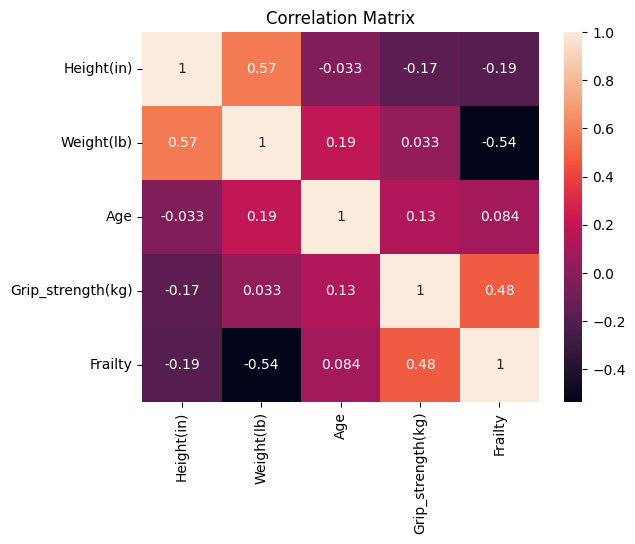

In [21]:
if not os.path.exists('results'):
    os.makedirs('results')


corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")


plt.savefig('results/correlation_matrix.png', dpi=300, bbox_inches='tight')


plt.show()

In [22]:
#Performing the 2 sample t-test as, i am assuiming the data is normally distributed
t2_test = stats.ttest_ind(data['Weight(lb)'],data['Frailty'])
print('analysis:',t2_test)

analysis: TtestResult(statistic=29.155389914737384, pvalue=1.3273210493059615e-16, df=18.0)


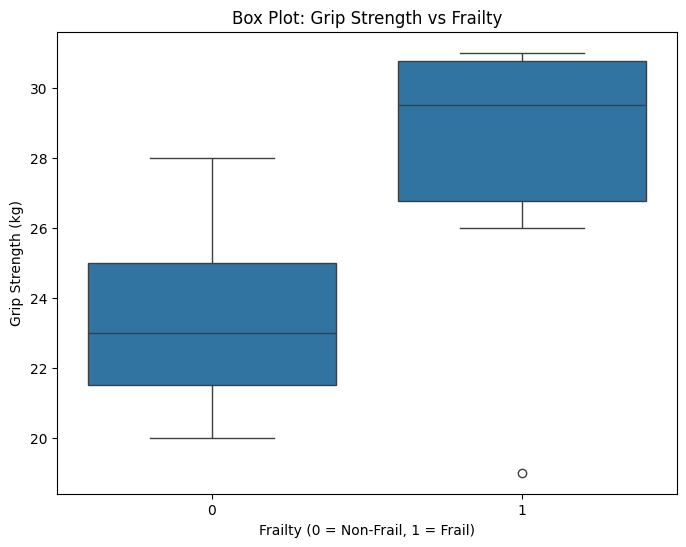

In [23]:
if not os.path.exists('results'):
    os.makedirs('results')


plt.figure(figsize=(8, 6))
sns.boxplot(x='Frailty', y='Grip_strength(kg)', data=data)
plt.title('Box Plot: Grip Strength vs Frailty')
plt.xlabel('Frailty (0 = Non-Frail, 1 = Frail)')
plt.ylabel('Grip Strength (kg)')


plt.savefig('results/grip_strength_vs_frailty_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()
